In [1]:
from bia_bob import bob

In [2]:
bob.initialize(endpoint='deepseek', model='deepseek-chat')

In [3]:
%%bob 
* load blobs.tif
* segment and label the individual objects
* measure their area
* color-code the objects with the area
* show the result

StackViewNDArray([[0.03218646, 0.03218646, 0.03218646, ..., 0.19311875,
                   0.19311875, 0.19311875],
                  [0.03218646, 0.03218646, 0.03218646, ..., 0.19311875,
                   0.19311875, 0.19311875],
                  [0.03218646, 0.03218646, 0.03218646, ..., 0.19311875,
                   0.19311875, 0.19311875],
                  ...,
                  [0.03218646, 0.03218646, 0.03218646, ..., 0.03218646,
                   0.03218646, 0.03218646],
                  [0.03218646, 0.03218646, 0.03218646, ..., 0.03218646,
                   0.03218646, 0.03218646],
                  [0.03218646, 0.03218646, 0.03218646, ..., 0.03218646,
                   0.03218646, 0.03218646]], dtype=float32)
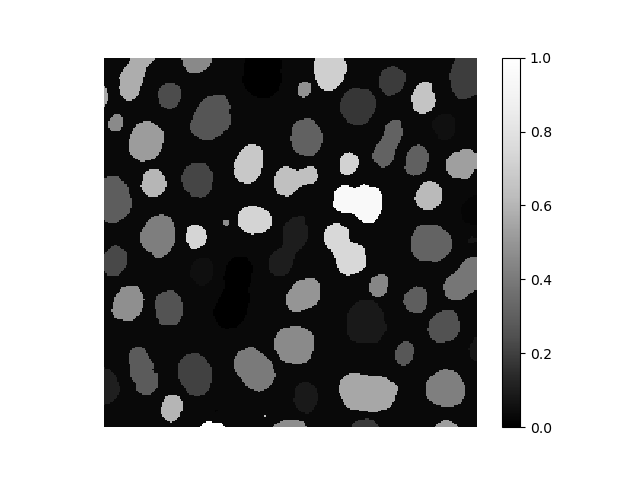
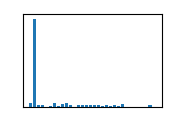

In [8]:
from skimage.io import imread
from skimage.measure import label, regionprops_table
import pandas as pd
import numpy as np
import stackview
import pyclesperanto_prototype as cle

# 1. Load the image
image = imread("blobs.tif")

# 2. Segment the image using Otsu's thresholding
binary_image = cle.threshold_otsu(image)

# 3. Label the segmented objects
label_image = cle.connected_components_labeling_box(binary_image)

# 4. Measure the area of each labeled object
properties = ['label', 'area']
measurements = regionprops_table(label_image, properties=properties)
df = pd.DataFrame(measurements)

# 5. Color-code the labeled objects based on their area
area_values = df['area'].values
area_values_normalized = (area_values - area_values.min()) / (area_values.max() - area_values.min())
colored_labels = cle.replace_intensities(label_image, area_values_normalized)

# 6. Display the color-coded result
stackview.insight(colored_labels)